<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-dsercam/blob/main/DataAnalysisWithPython/Module3.A01182676.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<font color="darkblue">Data Analysis with Python (IBM)</font>**
##**<font color="darkorange"> Module 3: Notes and exercises Jupyter Notebook</font>**

###**Maestría en Inteligencia Artificial Aplicada**
###**Curso: Ciencia y analítica de datos**
####**Tecnológico de Monterrey**
#####**Prof: María de la Paz Rico Fernández**

###**<font color="darkgray">Nombre del estudiante: Dante Rodrigo Serna Camarillo</font>**
###**<font color="darkgray">Matrícula: A01182676</font>**

### <b><font color="darkorange">Exploratory Data Analysis</font></b>
- Preliminary to data analysis, its objective is:
- Summarize main characteristics of the data
- Gain better understanding of the data set
- Uncover relationships between variables
- Extract Important variables
<br><br>
What are the charactersitics that have the more weight on out predictions?


### <b><font color="darkpurple">Descriptive statistics</font></b>
- Before bulding models, spend some time understanding your data. Some useful methods are:
- describe() -> automatically computes basic statistics for NUMERICAL features. <font color="darkred">IMPORTANT! NAN are excluded in the calculation of these statistics</font>
- value_counts() -> will summarize categorical data
<br><br>
Visualization of data:
- Boxplots are useful for numeric data (median, quartiles, outliers, quartile ranges, etc)
- Scatter plot help us visualize the realtion between two varibles. (Use predictor/independent variable on x axis, target variable in y axis).


In [7]:
# Get the CSV to perform some examples
import pandas as pd 
import numpy as np
csv_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
masterDataFrame = pd.read_csv(csv_path, skipinitialspace=True, header=None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
masterDataFrame.columns = headers
masterDataFrame.replace("?",0, inplace=True)
masterDataFrame["price"] = masterDataFrame["price"].astype("float")
masterDataFrame.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


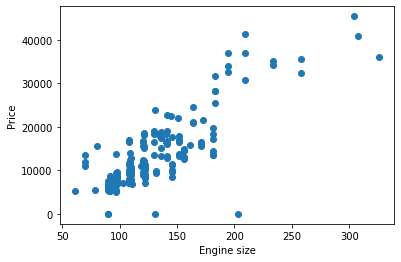

In [8]:
import matplotlib.pyplot as plt 
x = masterDataFrame['engine-size']
y = masterDataFrame['price']
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.scatter(x,y)


### <b><font color="darkpurple">Group by/Grouping data</font></b>
- Used for categorical features, groups data into categories
- You can group date by a single variable or multiple variables



In [11]:
#pick the columns you are interested in, in this case we want to determine the influence of drive-wheels & body-style over price
df_test = masterDataFrame[['drive-wheels','body-style','price']]
# group data by body-style and drive-wheels
groupedDataFrame = df_test.groupby(['drive-wheels','body-style'], as_index=False).mean()
groupedDataFrame

,drive-wheels,body-style,price
0,4wd,hatchback,3801.500000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9467.526316
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [13]:
#data can be visualized better using a pivot table
pivot_groupedDataFrame = groupedDataFrame.pivot(index='drive-wheels',columns='body-style')
pivot_groupedDataFrame

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   3801.500000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9467.526316   
rwd              23949.6  24202.714286  13583.157895  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

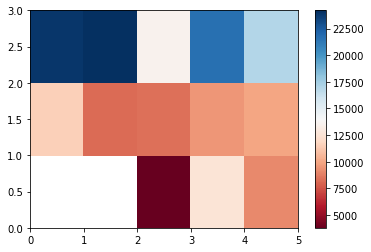

In [15]:
#heatmap is very useful as well
plt.pcolor(pivot_groupedDataFrame,cmap='RdBu')
plt.colorbar()
plt.show()

### <b><font color="darkpurple">Analysis of Variance - ANOVA</font></b>
- stands for (AN)ALYSIS (O)F (VA)RIANCE
- Statistical comparison of groups. Example: average price per vehicle make/brand

> Returns two values
- f-test score: variation between sample groups MEANS DIVIDED BY VARIATION within group sample
IMPORTANT: SMALL F SCORES BETWEEN SIMILAR GROUPS
- p-value: confidence degree




In [16]:
#extract make and price data
anovaFrame = masterDataFrame[['make','price']]
groupedAnova = anovaFrame.groupby(['make'])

In [20]:
import scipy.stats as stats
from scipy.stats import f_oneway
anova_results_1 = stats.f_oneway(groupedAnova.get_group('honda')['price'],groupedAnova.get_group('subaru')['price'])
anova_results_1

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

In [21]:
anova_results_1 = stats.f_oneway(groupedAnova.get_group('honda')['price'],groupedAnova.get_group('jaguar')['price'])
anova_results_1

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

There is a strong correlation between a categorical variable and other variables if the ANOVA test gives us a large F-test value and a small p-value.

### <b><font color="darkpurple">Correlation</font></b>
- Correlation determines how a variable is dependant of another variable.
- <font color='darkred'>IMPORTANT! CORREALTION DOES NOT IMPLY CAUSATION </font>




(0.0, 53128.21847281936)

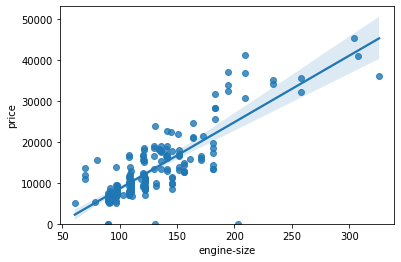

In [23]:
#lets analyze correlation between engine size and price
import seaborn as sns 

sns.regplot(x='engine-size', y ='price', data=masterDataFrame)
plt.ylim(0,)

In [ ]:
#graph shows positive lienar correlation between engine-size and price

(0.0, 48158.6272053141)

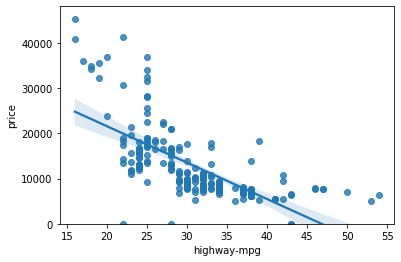

In [24]:
sns.regplot(x='highway-mpg', y ='price', data=masterDataFrame)
plt.ylim(0,)
#shows negative lienar correlation, as the highway-mpg value increases, the price decreases

###- <font color='darkred'>IMPORTANT! both features appear to be good predictors of prices as lines are steep </font>

(0.0, 47670.0)

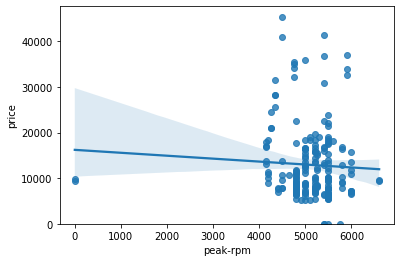

In [26]:
masterDataFrame['peak-rpm'] = masterDataFrame['peak-rpm'].astype("float")
sns.regplot(x='peak-rpm', y ='price', data=masterDataFrame)
plt.ylim(0,)
#shows negative lienar correlation, as the highway-mpg value increases, the price decreases

###- <font color='darkred'>IMPORTANT! as an example of a weak correlation,peak-rpm, where low and high values of peak rpm have low and high prices, therefore, we cannot use RPM to predict price values</font>

### <b><font color="darkpurple">Correlation - Statistics </font></b>
-  Measuring the strength of the correlation between continuous numerical variables by using the **Pearson Correlation** method. Pearson Correlation returns two values: Correlation coefficient and the p-value.

- Correlation Coefficient
> - Value close to 1 implies a large positive correlation
> - Value close to -1 implies a large negative correlation
> - Value close to 0 implies no correlation between the variables.

- P Value (how certain are we about the calculated correlation coefficient)
> - value less than 0.001 gives us a strong certainty about the correlation
coefficient that we calculated.
> - value between 0.001 and 0.05 gives us moderate certainty
> - value between 0.05 and 0.1 will give us a weak certainty
> - p-value larger than 0.1 will give us no certainty of correlation

Under that consideration:<br>
**Strong correlation** > the correlation coefficient is close
to 1 or -1 and the p-value is less than 0.001. 


In [28]:
#correlation between horsepower and price
masterDataFrame['horsepower'] = masterDataFrame['horsepower'].astype("float")
pearson_coef, p_value = stats.pearsonr(masterDataFrame['horsepower'], masterDataFrame['price'])
print(pearson_coef)
print(p_value)

#strong postive correlation!

0.6912878787942788
1.8175735366187956e-30


## <b><font color="darkorange">LAB </font></b>


In [31]:
#you are running the lab in your  browser, so we will install the libraries using ``piplite``
import pandas as pd
import numpy as np

In [34]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
labFrame = pd.read_csv(csv_path)

In [41]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
labFrame.columns = headers
labFrame.replace("?",0, inplace=True)
labFrame["price"] = labFrame["price"].astype("float")
labFrame["normalized-losses"] = labFrame["normalized-losses"].astype("int")
labFrame["wheel-base"] = labFrame["wheel-base"].astype("float")
labFrame["length"] = labFrame["length"].astype("float")
labFrame["width"] = labFrame["width"].astype("float")
labFrame["height"] = labFrame["height"].astype("float")
labFrame["curb-weight"] = labFrame["curb-weight"].astype("int")
labFrame["engine-size"] = labFrame["engine-size"].astype("int")
labFrame["bore"] = labFrame["bore"].astype("float")
labFrame["stroke"] = labFrame["stroke"].astype("float")
labFrame["compression-ratio"] = labFrame["compression-ratio"].astype("float")
labFrame["horsepower"] = labFrame["horsepower"].astype("float")
labFrame["peak-rpm"] = labFrame["peak-rpm"].astype("float")
labFrame["city-mpg"] = labFrame["city-mpg"].astype("float")
labFrame["highway-mpg"] = labFrame["highway-mpg"].astype("float")
labFrame.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
1,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
4,2,0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [42]:
print(labFrame.dtypes)

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object


In [43]:
labFrame['peak-rpm'].dtypes

dtype('float64')

In [44]:
labFrame.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.214261,-0.525095,-0.356792,-0.227799,-0.533078,-0.229281,-0.107229,-0.283468,-0.200894,-0.177413,0.064619,0.180572,-0.030557,0.039598,-0.072583
normalized-losses,0.214261,1.000000,-0.213197,-0.241855,-0.205382,-0.187203,-0.263233,-0.302833,-0.212144,-0.150523,-0.071741,-0.182484,0.240781,0.146714,0.167824,-0.239042
wheel-base,-0.525095,-0.213197,1.000000,0.877612,0.795115,0.582603,0.781763,0.573989,0.322898,0.152148,0.249199,0.355793,-0.218205,-0.479633,-0.552897,0.583474
length,-0.356792,-0.241855,0.877612,1.000000,0.841199,0.491969,0.878090,0.683830,0.357881,0.119789,0.157913,0.526933,-0.227331,-0.673251,-0.706635,0.685474
width,-0.227799,-0.205382,0.795115,0.841199,1.000000,0.274075,0.868493,0.737042,0.296963,0.112198,0.180287,0.615970,-0.173379,-0.647177,-0.681169,0.697163
height,-0.533078,-0.187203,0.582603,0.491969,0.274075,1.000000,0.298429,0.068577,0.299406,0.157134,0.261036,-0.096726,-0.197307,-0.055659,-0.113995,0.160724
curb-weight,-0.229281,-0.263233,0.781763,0.878090,0.868493,0.298429,1.000000,0.850611,0.362098,0.128700,0.151372,0.728628,-0.177845,-0.758238,-0.798088,0.799787
engine-size,-0.107229,-0.302833,0.573989,0.683830,0.737042,0.068577,0.850611,1.000000,0.454794,0.268533,0.029083,0.781588,-0.176767,-0.654101,-0.677775,0.838093
bore,-0.283468,-0.212144,0.322898,0.357881,0.296963,0.299406,0.362098,0.454794,1.000000,0.695716,0.025992,0.256915,-0.268375,-0.136821,-0.158869,0.264067
stroke,-0.200894,-0.150523,0.152148,0.119789,0.112198,0.157134,0.128700,0.268533,0.695716,1.000000,0.126873,0.002454,-0.266685,0.123718,0.103436,0.049276


In [46]:
labFrame[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,0.695716,0.025992,0.256915
stroke,0.695716,1.000000,0.126873,0.002454
compression-ratio,0.025992,0.126873,1.000000,-0.189818
horsepower,0.256915,0.002454,-0.189818,1.000000


(0.0, 52343.80839495405)

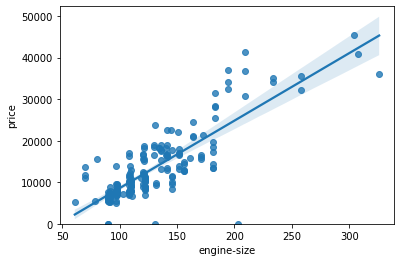

In [48]:
sns.regplot(x="engine-size", y="price", data=labFrame)
plt.ylim(0,)

In [49]:
labFrame[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.838093
price,0.838093,1.000000


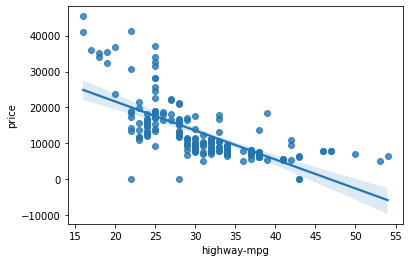

In [50]:
#Highway mpg is a potential predictor variable of price. Let's find the scatterplot of "highway-mpg" and "price".
sns.regplot(x="highway-mpg", y="price", data=labFrame)

In [52]:
labFrame[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.688005
price,-0.688005,1.000000


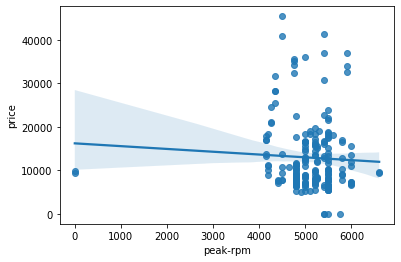

In [54]:
#Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. 
#Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.
sns.regplot(x="peak-rpm", y="price", data=labFrame)

In [55]:
#Weak Linear Relationship
#Let's see if "peak-rpm" is a predictor variable of "price".
labFrame[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.055244
price,-0.055244,1.000000


In [56]:
#Find the correlation between x="stroke" and y="price".
labFrame[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.049276
price,0.049276,1.000000


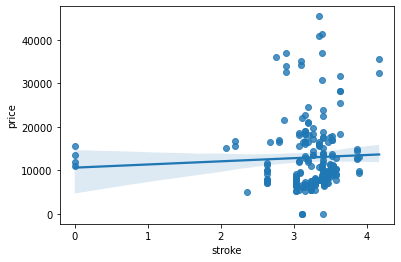

In [57]:
#Given the correlation results between "price" and "stroke", we also expect a weak relationship
sns.regplot(x="stroke", y="price", data=labFrame)

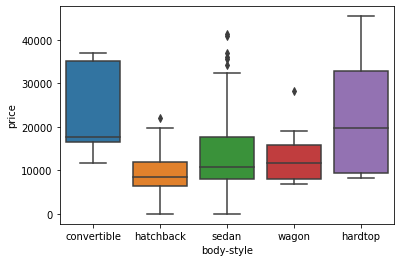

In [59]:
#boxplots of per categorical values
sns.boxplot(x="body-style", y="price", data=labFrame)

#We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price.

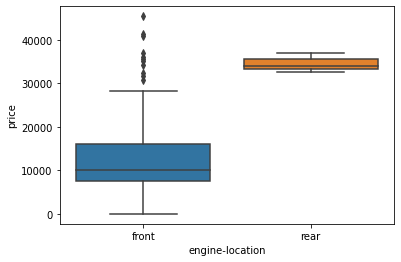

In [61]:
sns.boxplot(x="engine-location", y="price", data=labFrame)
#>Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

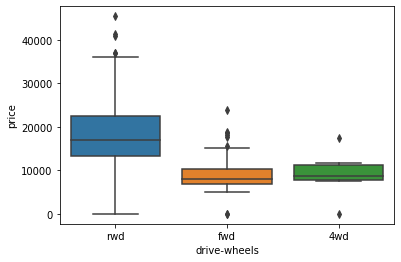

In [62]:
sns.boxplot(x="drive-wheels", y="price", data=labFrame)
#the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price

In [63]:
#include categorical features in the describe method as
labFrame.describe(include=['object'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,204,204,204,204,204,204,204,204,204,204
unique,22,2,2,3,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,184,167,114,96,120,201,148,158,93


In [64]:
#We can convert the series to a dataframe as follows:
labFrame['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,120
rwd,75
4wd,9


In [67]:

#Let's repeat the above steps but save the results to the dataframe "drive_wheels_counts" and rename the column 'drive-wheels' to 'value_counts'.
drive_wheels_counts = labFrame['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,120
rwd,75
4wd,9


In [68]:
labFrame['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [70]:
df_gptest = labFrame[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,3801.500000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9467.526316
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


In [73]:

#we will leave the drive-wheels variable as the rows of the table, and pivot body-style to become the columns of the table:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                 0.00      0.000000   3801.500000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9467.526316   
rwd             26563.25  24202.714286  13583.157895  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [74]:
df_gptest2 = labFrame[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,23569.600000
1,hardtop,22208.500000
2,hatchback,9672.942857
3,sedan,14158.510417
4,wagon,12371.960000


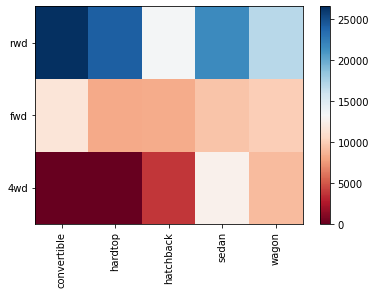

In [75]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [79]:
#excersies support
df_test = masterDataFrame[['body-style', 'price']]
df_grp = df_test.groupby(['body-style'], as_index=False).mean()
df_grp['price']

0    21890.500000
1    22208.500000
2     9672.942857
3    14158.510417
4    12371.960000
Name: price, dtype: float64

###**<font color="darkorange">GRADED REVIEW QUESTIONS - EVIDENCE.</font>**

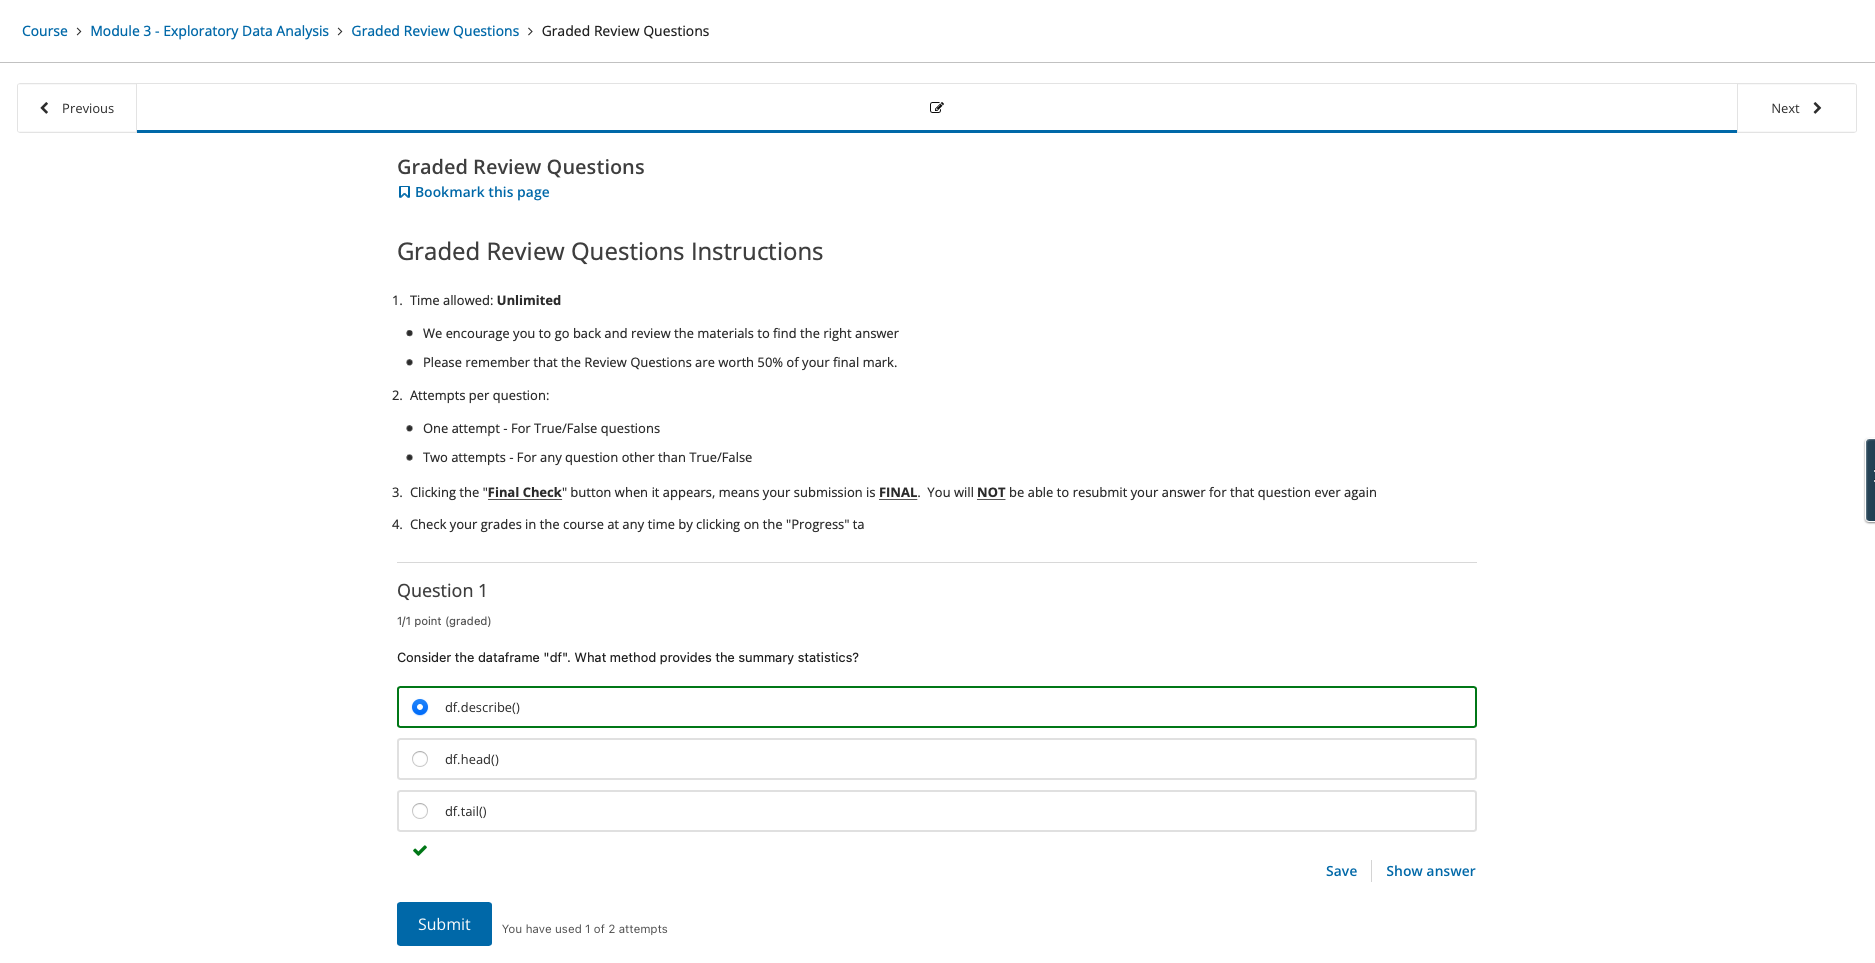

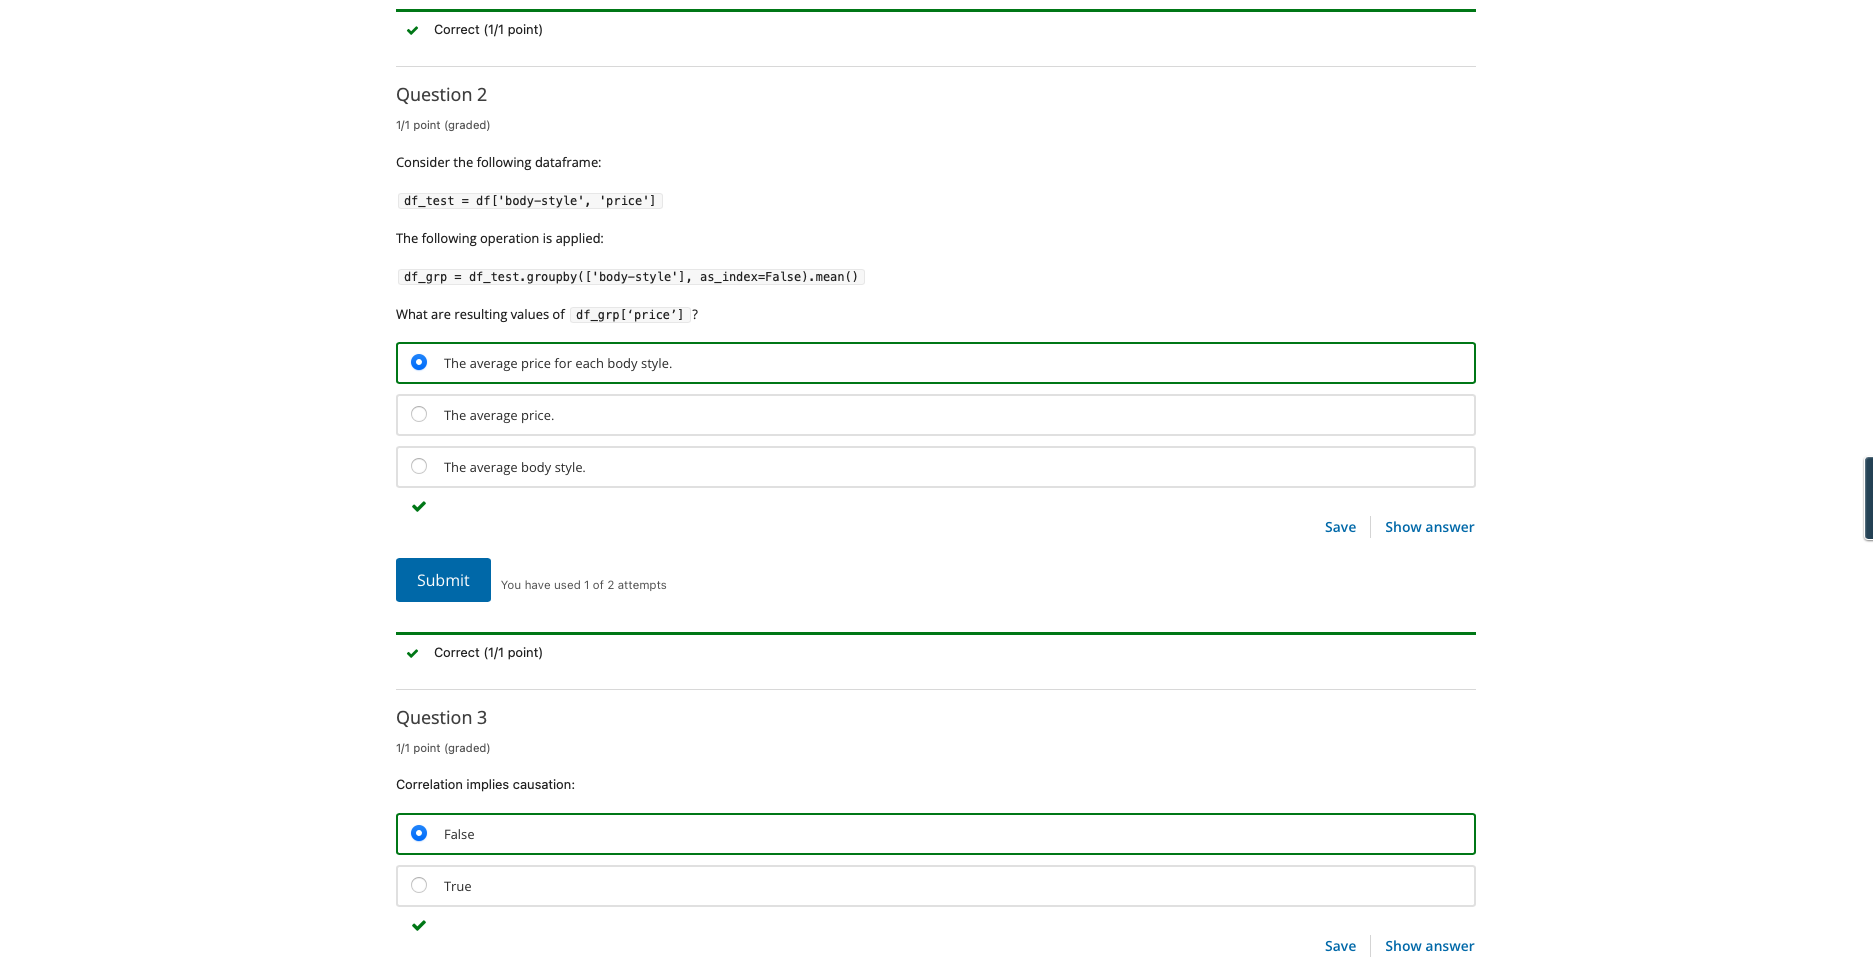

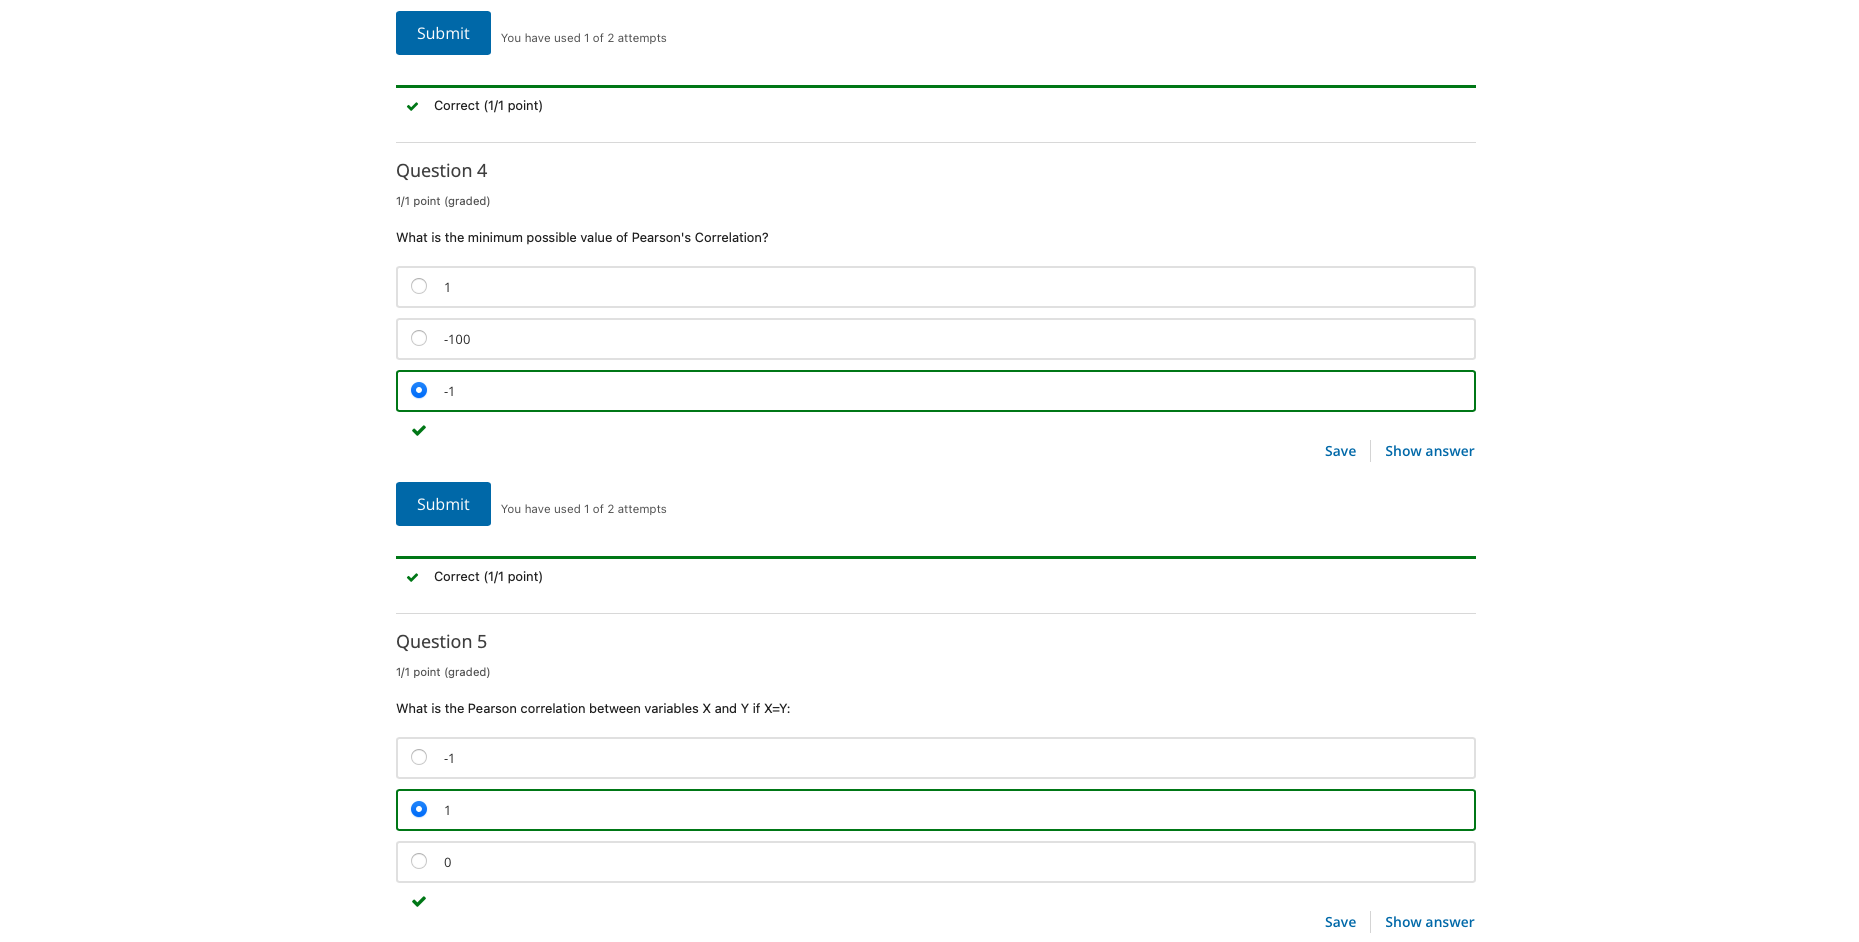

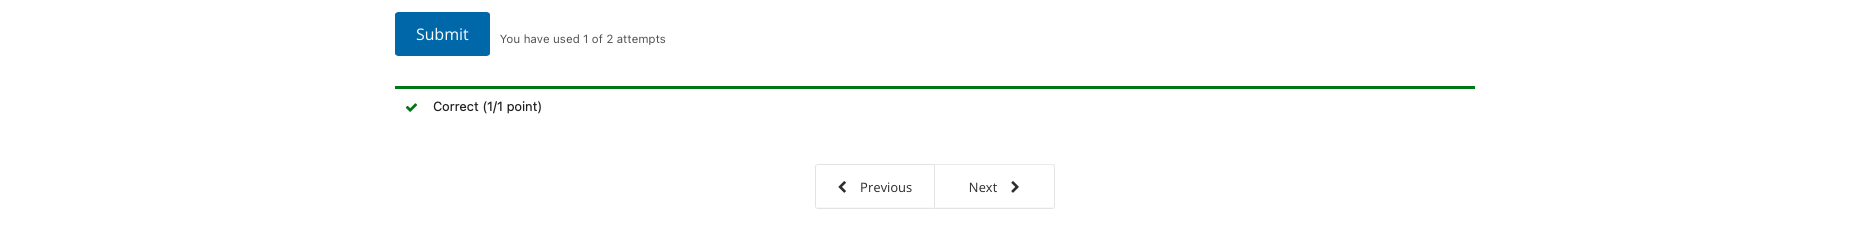

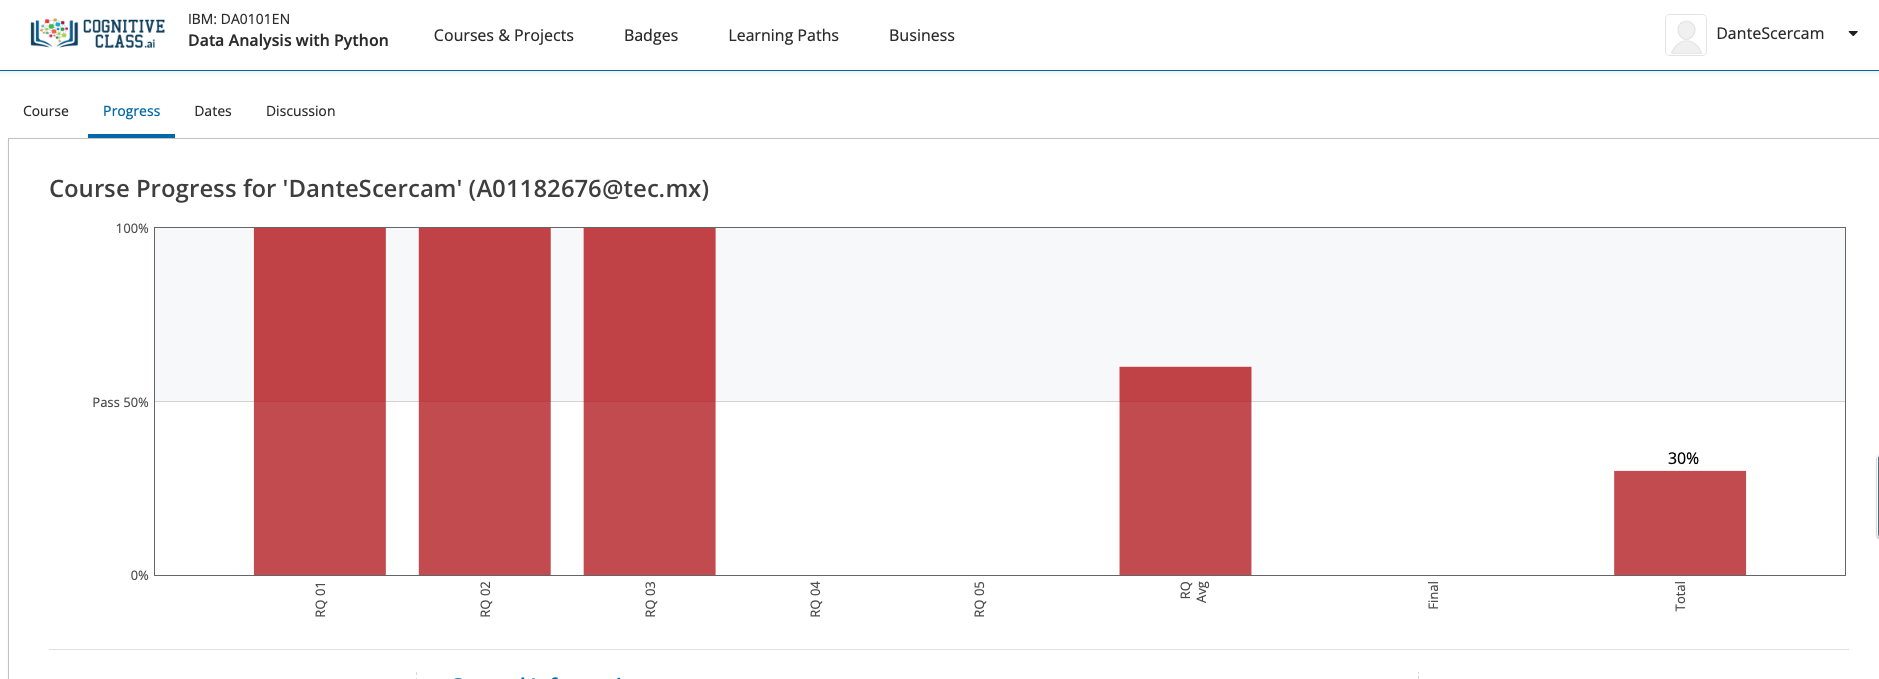